***Scrapping the Data from McDonald's Website ***

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#URL of the website to scrape
url = "https://en.wikipedia.org/wiki/McDonald%27s"
r = requests.get(url)
#print(r)

#Creating a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(r.text,"lxml")
#print(soup.prettify)

#Find the table with the class "wikitable float-left"
table = soup.find("table", class_ = "wikitable float-left")
title = table.find_all("th")
#print(title)
#print(table)

#Initialize an empty list to store column headers
header = []
for i in title:
    name = i.text.strip()
    header.append(name)

# Create an empty DataFrame with the extracted column headers
df = pd.DataFrame(columns=header)
#print(df)

# Find all rows of the table
rows = table.find_all("tr")
#print(rows)

# Iterate through rows starting from the second row (skipping the header row)
for i in rows[1:]:
    data = i.find_all("td")
    # Extract data from each cell in the row, removing leading/trailing whitespace
    row = [tr.text.strip() for tr in data]
    #print(row)
    l = len(df)
    # Append the row data to the DataFrame
    df.loc[l] = row


# Remove '\n' characters from the entire DataFrame
df = df.apply(lambda x: x.str.replace('\n' , ''))

# Print the cleaned DataFrame
print(df)


    Year Revenuein million US$ Net incomein million US$  \
0   2005                19,117                    2,602   
1   2006                20,895                    3,544   
2   2007                22,787                    2,395   
3   2008                23,522                    4,313   
4   2009                22,745                    4,551   
5   2010                24,075                    4,946   
6   2011                27,006                    5,503   
7   2012                27,567                    5,465   
8   2013                28,106                    5,586   
9   2014                27,441                    4,758   
10  2015                25,413                    4,529   
11  2016                24,622                    4,687   
12  2017                22,820                    5,192   
13  2018                21,025                    5,924   
14  2019                21,077                    6,025   
15  2020                19,208                    4,731 

***Extracting the 5 years with Highest Revenue***

In [ ]:
#print the top 5 data of a table
print(df.head())

   Year  Revenue (million US$)  Net Income (million US$)  \
0  2005                  19117                      2602   
1  2006                  20895                      3544   
2  2007                  22787                      2395   
3  2008                  23522                      4313   
4  2009                  22745                      4551   

   Total Assets (million US$)  Price per Share (USD$) Locations[134] Employees  
0                       29989                   31.88                           
1                       28975                   36.79         31,046            
2                       29392                   50.98         31,377            
3                       28462                   58.06         31,967            
4                       30225                   57.44         32,478   385,000  


***Identifying the Columns of the Table***

In [ ]:
#print the columns
print(df.columns)

Index(['Year', 'Revenue (million US$)', 'Net Income (million US$)',
       'Total Assets (million US$)', 'Price per Share (USD$)',
       'Locations[134]', 'Employees'],
      dtype='object')


***Calculating Statistics Summary of the Table ***

In [ ]:
# basic summary statistics
summary = df[['Revenue (million US$)', 'Net Income (million US$)',
       'Total Assets (million US$)', 'Price per Share (USD$)',
       'Locations[134]', 'Employees']].describe()
print(summary)

       Revenue (million US$)  Net Income (million US$)  \
count              17.000000                 17.000000   
mean            23567.588235               4840.941176   
std              2837.067149               1239.566732   
min             19117.000000               2395.000000   
25%             21077.000000               4529.000000   
50%             23223.000000               4758.000000   
75%             25413.000000               5503.000000   
max             28106.000000               7545.000000   

       Total Assets (million US$)  Price per Share (USD$)  
count                   17.000000               17.000000  
mean                 35739.411765              108.546471  
std                   7944.266376               61.069295  
min                  28462.000000               31.880000  
25%                  30225.000000               58.060000  
50%                  32990.000000               96.380000  
75%                  36626.000000              148.760000

***Arranging the data in descending order of Revenue***

In [ ]:
#Sorted by Revenue
sorted_by_revenue = df.sort_values(by='Revenue (million US$)', ascending=False)
print(sorted_by_revenue)

    Year  Revenue (million US$)  Net Income (million US$)  \
8   2013                  28106                      5586   
7   2012                  27567                      5465   
9   2014                  27441                      4758   
6   2011                  27006                      5503   
10  2015                  25413                      4529   
11  2016                  24622                      4687   
5   2010                  24075                      4946   
3   2008                  23522                      4313   
16  2021                  23223                      7545   
12  2017                  22820                      5192   
2   2007                  22787                      2395   
4   2009                  22745                      4551   
14  2019                  21077                      6025   
13  2018                  21025                      5924   
1   2006                  20895                      3544   
15  2020                

***Identifying Year with Highest Revenue and Lowest Revenue***

In [ ]:
# Find the year with the highest revenue
highest_revenue_year = sorted_df['Year'].iloc[0]
highest_revenue_value = sorted_df['Revenue (million US$)'].iloc[0]

# Find the year with the lowest revenue
lowest_revenue_year = sorted_df['Year'].iloc[-1]
lowest_revenue_value = sorted_df['Revenue (million US$)'].iloc[-1]

print(f"Year with Highest Revenue: {highest_revenue_year} (Revenue: {highest_revenue_value} million US$)")
print(f"Year with Lowest Revenue: {lowest_revenue_year} (Revenue: {lowest_revenue_value} million US$)")








Year with Highest Revenue: 2021 (Revenue: 23223 million US$)
Year with Lowest Revenue: 2007 (Revenue: 22787 million US$)


***Arranging the data in descending order of Net Income***

In [ ]:
# Sort the DataFrame by Net Income in decreasing order
sorted_df = df.sort_values(by=['Net Income (million US$)'], ascending=[False])

# Print the sorted DataFrame
print(sorted_df)


    Year  Revenue (million US$)  Net Income (million US$)  \
16  2021                  23223                      7545   
14  2019                  21077                      6025   
13  2018                  21025                      5924   
8   2013                  28106                      5586   
6   2011                  27006                      5503   
7   2012                  27567                      5465   
12  2017                  22820                      5192   
5   2010                  24075                      4946   
9   2014                  27441                      4758   
15  2020                  19208                      4731   
11  2016                  24622                      4687   
4   2009                  22745                      4551   
10  2015                  25413                      4529   
3   2008                  23522                      4313   
1   2006                  20895                      3544   
0   2005                

***Identifying Year with Highest Net Income and Lowest Net Income***

In [ ]:
# Find the year with the highest net income
highest_net_income_year = sorted_df['Year'].iloc[0]
highest_net_income_value = sorted_df['Net Income (million US$)'].iloc[0]

# Find the year with the lowest net income
lowest_net_income_year = sorted_df['Year'].iloc[-1]
lowest_net_income_value = sorted_df['Net Income (million US$)'].iloc[-1]

print(f"Year with Highest Net Income: {highest_net_income_year} (Net Income: {highest_net_income_value} million US$)")
print(f"Year with Lowest Net Income: {lowest_net_income_year} (Net Income: {lowest_net_income_value} million US$)")








Year with Highest Net Income: 2021 (Net Income: 7545 million US$)
Year with Lowest Net Income: 2007 (Net Income: 2395 million US$)


***Arranging the data in descending order of Total Assets***

In [ ]:
# Sort the DataFrame by Total Assets in decreasing order
sorted_df = df.sort_values(by=['Total Assets (million US$)'], ascending=[False])

# Print the sorted DataFrame
print(sorted_df)

    Year  Revenue (million US$)  Net Income (million US$)  \
16  2021                  23223                      7545   
15  2020                  19208                      4731   
14  2019                  21077                      6025   
10  2015                  25413                      4529   
8   2013                  28106                      5586   
7   2012                  27567                      5465   
9   2014                  27441                      4758   
12  2017                  22820                      5192   
6   2011                  27006                      5503   
13  2018                  21025                      5924   
5   2010                  24075                      4946   
11  2016                  24622                      4687   
4   2009                  22745                      4551   
0   2005                  19117                      2602   
2   2007                  22787                      2395   
1   2006                

***Identifying Year with Highest Total Assets and Lowest Total Assets***

In [ ]:
# Find the year with the highest total assets
highest_assets_year = sorted_df['Year'].iloc[0]
highest_assets_value = sorted_df['Total Assets (million US$)'].iloc[0]

# Find the year with the lowest total assets
lowest_assets_year = sorted_df['Year'].iloc[-1]
lowest_assets_value = sorted_df['Total Assets (million US$)'].iloc[-1]

print(f"Year with Highest Total Assets: {highest_assets_year} (Total Assets: {highest_assets_value} million US$)")
print(f"Year with Lowest Total Assets: {lowest_assets_year} (Total Assets: {lowest_assets_value} million US$)")

Year with Highest Total Assets: 2021 (Total Assets: 53606 million US$)
Year with Lowest Total Assets: 2008 (Total Assets: 28462 million US$)


***Arranging the data in descending order of Prices Per Share***

In [ ]:
# Sort the DataFrame by Prices per share in decreasing order
sorted_df = df.sort_values(by=['Price per Share (USD$)'], ascending=[False])

# Print the sorted DataFrame
print(sorted_df)


    Year  Revenue (million US$)  Net Income (million US$)  \
16  2021                  23223                      7545   
15  2020                  19208                      4731   
14  2019                  21077                      6025   
13  2018                  21025                      5924   
12  2017                  22820                      5192   
11  2016                  24622                      4687   
10  2015                  25413                      4529   
8   2013                  28106                      5586   
9   2014                  27441                      4758   
7   2012                  27567                      5465   
6   2011                  27006                      5503   
5   2010                  24075                      4946   
3   2008                  23522                      4313   
4   2009                  22745                      4551   
2   2007                  22787                      2395   
1   2006                

***Identifying Year with Highest Prices Per share and Lowest Prices Per share***

In [ ]:
# Find the year with the highest price per share
highest_price_per_share_year = sorted_df['Year'].iloc[0]
highest_price_per_share_value = sorted_df['Price per Share (USD$)'].iloc[0]

# Find the year with the lowest price per share
lowest_price_per_share_year = sorted_df['Year'].iloc[-1]
lowest_price_per_share_value = sorted_df['Price per Share (USD$)'].iloc[-1]

print(f"Year with Highest Price per Share: {highest_price_per_share_year} (Price per Share: ${highest_price_per_share_value})")
print(f"Year with Lowest Price per Share: {lowest_price_per_share_year} (Price per Share: ${lowest_price_per_share_value})")


Year with Highest Price per Share: 2021 (Price per Share: $234.69)
Year with Lowest Price per Share: 2005 (Price per Share: $31.88)


***Calculating Mean , Median , Mode , Standard Deviation and Variance***

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Create a DataFrame with the provided data
data = {
    'Year': [2021, 2020, 2019, 2015, 2013, 2012, 2014, 2017, 2011, 2018, 2010, 2016, 2009, 2005, 2007, 2006, 2008],
    'Revenue (million US$)': [23223, 19208, 21077, 25413, 28106, 27567, 27441, 22820, 27006, 21025, 24075, 24622, 22745, 19117, 22787, 20895, 23522],
    'Net Income (million US$)': [7545, 4731, 6025, 4529, 5586, 5465, 4758, 5192, 5503, 5924, 4946, 4687, 4551, 2602, 2395, 3544, 4313],
    'Total Assets (million US$)': [53606, 52627, 47511, 37939, 36626, 35387, 34227, 33804, 32990, 32811, 31975, 31024, 30225, 29989, 29392, 28975, 28462],
    'Price per Share (USD$)': [234.69, 200.89, 198.27, 100.28, 97.26, 92.53, 96.38, 148.76, 83.97, 166.06, 70.91, 120.14, 57.44, 31.88, 50.98, 36.79, 58.06],
    'Employees': [200000, 200000, 205000, 420000, 440000, 440000, 420000, 235000, 420000, 210000, 400000, 375000, 385000, None, None, None, None]
}

df = pd.DataFrame(data)

# Initialize a new DataFrame to store statistics
stats_df = pd.DataFrame(columns=['Metric', 'Mean', 'Median', 'Mode', 'Standard Deviation', 'Variance'])

# Calculate statistics for each metric
metrics = df.columns[1:]  # Exclude the 'Year' column

for metric in metrics:
    mean = df[metric].mean()
    median = df[metric].median()
    mode = stats.mode(df[metric])[0][0]
    std_dev = df[metric].std()
    variance = df[metric].var()

    stats_df = stats_df.append({
        'Metric': metric,
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Standard Deviation': std_dev,
        'Variance': variance
    }, ignore_index=True)

# Print the tabular form of statistics
print(stats_df)







                       Metric           Mean     Median   Mode  \
0       Revenue (million US$)   23567.588235   23223.00  19117   
1    Net Income (million US$)    4840.941176    4758.00   2395   
2  Total Assets (million US$)   35739.411765   32990.00  28462   
3      Price per Share (USD$)     108.546471      96.38  31.88   
4                   Employees  334615.384615  385000.00    NaN   

   Standard Deviation      Variance  
0         2837.067149  8.048950e+06  
1         1239.566732  1.536526e+06  
2         7944.266376  6.311137e+07  
3           61.069295  3.729459e+03  
4       104492.055887  1.091859e+10  


<ipython-input-5-3201f18adde7>:26: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(df[metric])[0][0]
<ipython-input-5-3201f18adde7>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
<ipython-input-5-3201f18adde7>:26: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic 

***Creating a Stacked Bar Chart***

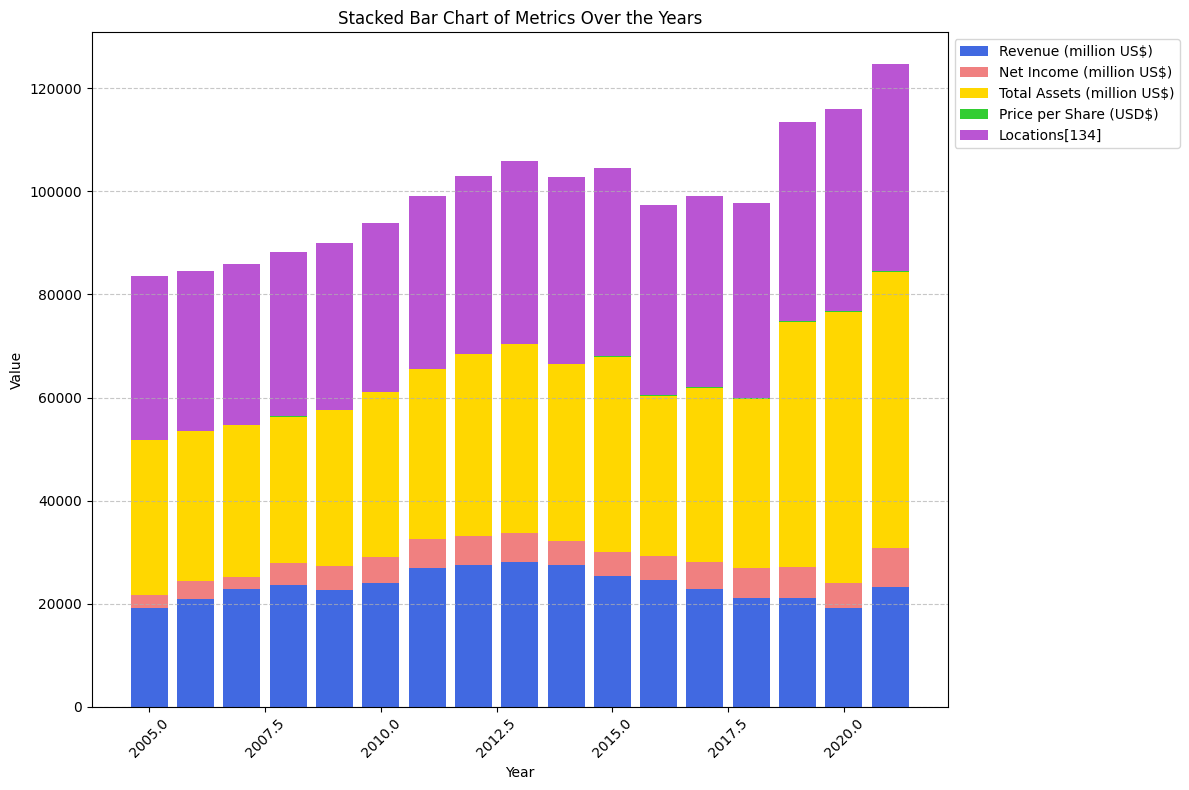

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Year': [2021, 2020, 2019, 2015, 2013, 2012, 2014, 2017, 2011, 2018, 2010, 2016, 2009, 2005, 2007, 2006, 2008],
    'Revenue (million US$)': [23223, 19208, 21077, 25413, 28106, 27567, 27441, 22820, 27006, 21025, 24075, 24622, 22745, 19117, 22787, 20895, 23522],
    'Net Income (million US$)': [7545, 4731, 6025, 4529, 5586, 5465, 4758, 5192, 5503, 5924, 4946, 4687, 4551, 2602, 2395, 3544, 4313],
    'Total Assets (million US$)': [53606, 52627, 47511, 37939, 36626, 35387, 34227, 33804, 32990, 32811, 31975, 31024, 30225, 29989, 29392, 28975, 28462],
    'Price per Share (USD$)': [234.69, 200.89, 198.27, 100.28, 97.26, 92.53, 96.38, 148.76, 83.97, 166.06, 70.91, 120.14, 57.44, 31.88, 50.98, 36.79, 58.06],
    'Locations[134]': [40031, 39198, 38695, 36525, 35429, 34480, 36258, 37241, 33510, 37855, 32737, 36899, 32478, 31888, 31377, 31046, 31967],
    'Employees': [200000, 200000, 205000, 420000, 440000, 440000, 420000, 235000, 420000, 210000, 400000, 375000, 385000, None, None, None, None]
}

df = pd.DataFrame(data)

# Define the metrics to plot (excluding 'Year' and 'Employees')
metrics_to_plot = df.columns[1:-1]

# Set the color map for the metrics
colors = ['royalblue', 'lightcoral', 'gold', 'limegreen', 'mediumorchid']

# Create the stacked bar chart
plt.figure(figsize=(12, 8))
bottom = None

for metric, color in zip(metrics_to_plot, colors):
    plt.bar(df['Year'], df[metric], label=metric, color=color, bottom=bottom)
    if bottom is None:
        bottom = df[metric]
    else:
        bottom += df[metric]

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Stacked Bar Chart of Metrics Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()










***Creating a Pie Chart of Revenue ***

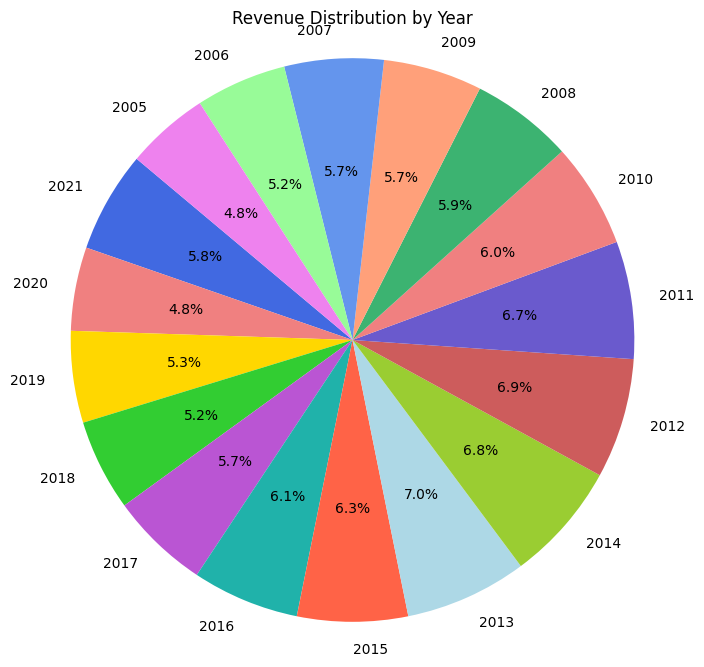

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Year': [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2013, 2014, 2012, 2011, 2010, 2008, 2009, 2007, 2006, 2005],
    'Revenue (million US$)': [23223, 19208, 21077, 21025, 22820, 24622, 25413, 28106, 27441, 27567, 27006, 24075, 23522, 22745, 22787, 20895, 19117]
}

df = pd.DataFrame(data)

# Set colors for each year
colors = ['royalblue', 'lightcoral', 'gold', 'limegreen', 'mediumorchid', 'lightseagreen', 'tomato', 'lightblue', 'yellowgreen', 'indianred', 'slateblue', 'lightcoral', 'mediumseagreen', 'lightsalmon', 'cornflowerblue', 'palegreen', 'violet']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Revenue (million US$)'], labels=df['Year'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()





***Creating a Line Chart of Net Income***

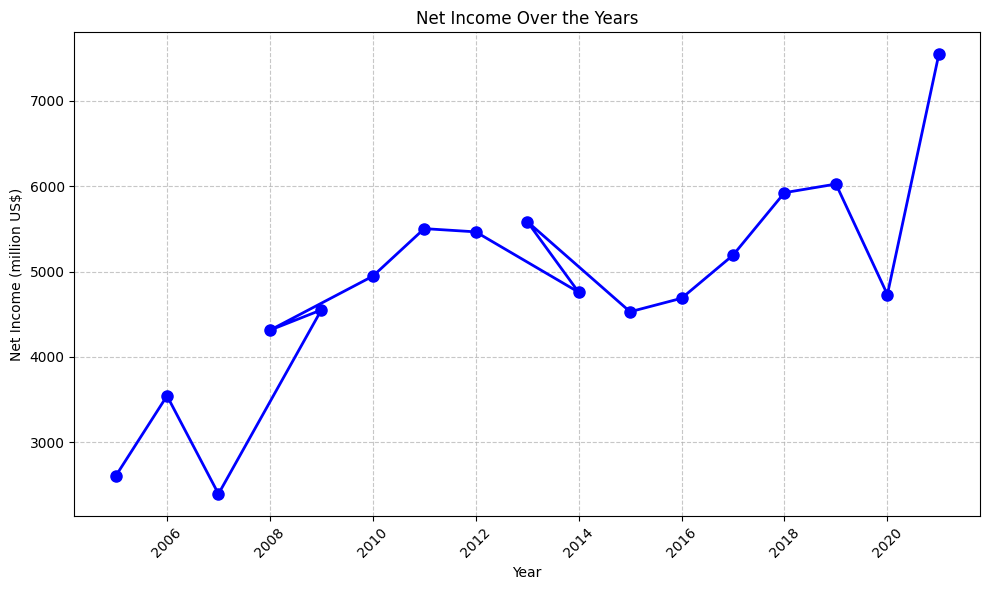

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Year': [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2013, 2014, 2012, 2011, 2010, 2008, 2009, 2007, 2006, 2005],
    'Net Income (million US$)': [7545, 4731, 6025, 5924, 5192, 4687, 4529, 5586, 4758, 5465, 5503, 4946, 4313, 4551, 2395, 3544, 2602]
}

df = pd.DataFrame(data)

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Net Income (million US$)'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Year')
plt.ylabel('Net Income (million US$)')
plt.title('Net Income Over the Years')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




***Creating a Boxplot Of Total Assets***

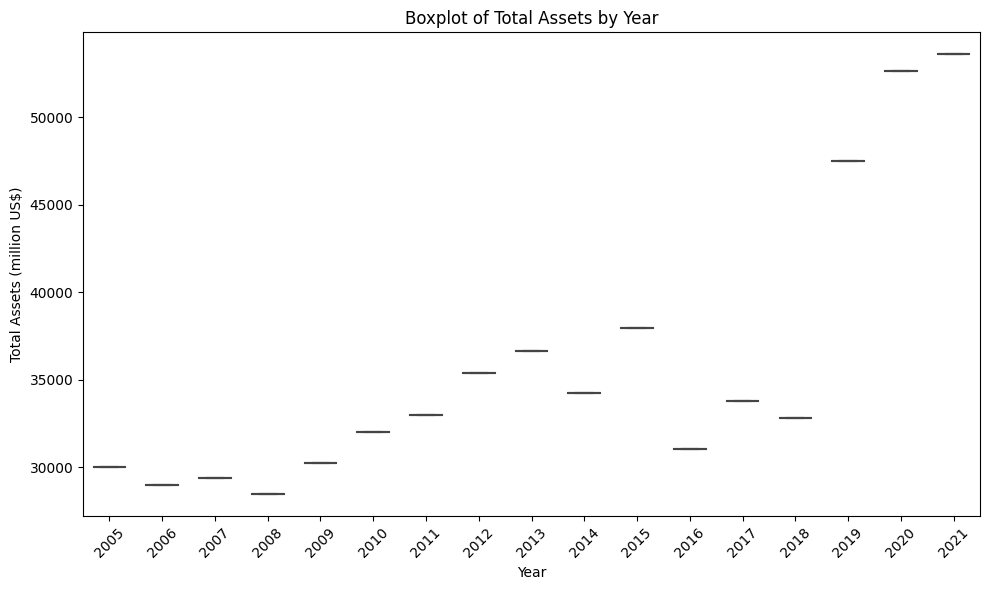

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    "Year": [
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021
    ],
    "Total assetsin million US$": [
        29989, 28975, 29392, 28462, 30225, 31975, 32990, 35387, 36626, 34227,
        37939, 31024, 33804, 32811, 47511, 52627, 53606
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Year", y="Total assetsin million US$", data=df, width=0.6)
plt.xticks(rotation=45)
plt.title("Boxplot of Total Assets by Year")
plt.xlabel("Year")
plt.ylabel("Total Assets (million US$)")
plt.tight_layout()

# Show the plot
plt.show()









***Creating a Bar Graph of Prices Per Share***

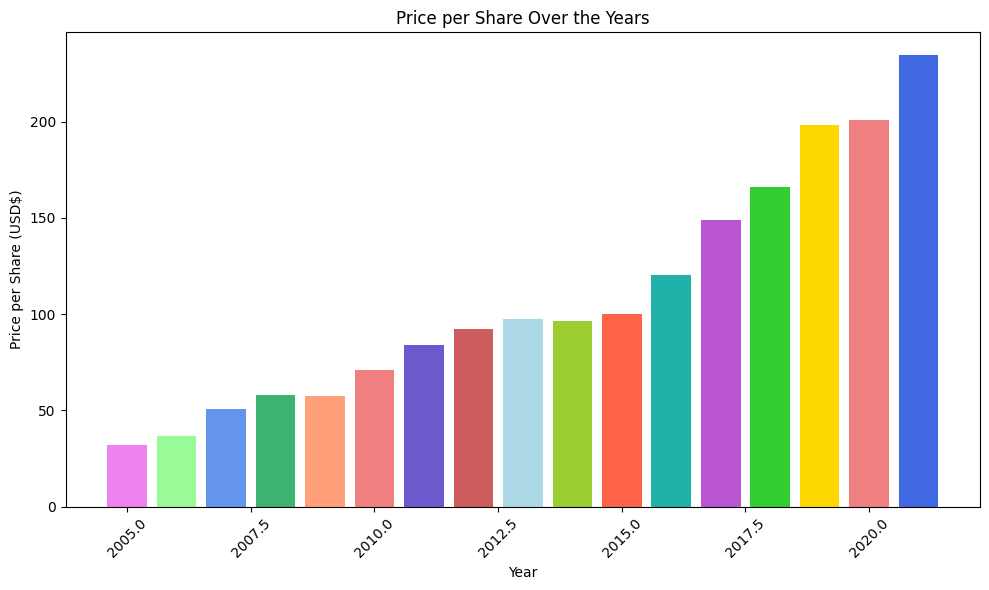

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Year': [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2013, 2014, 2012, 2011, 2010, 2008, 2009, 2007, 2006, 2005],
    'Price per Share (USD$)': [234.69, 200.89, 198.27, 166.06, 148.76, 120.14, 100.28, 97.26, 96.38, 92.53, 83.97, 70.91, 58.06, 57.44, 50.98, 36.79, 31.88]
}

df = pd.DataFrame(data)

# Set colors for each year
colors = ['royalblue', 'lightcoral', 'gold', 'limegreen', 'mediumorchid', 'lightseagreen', 'tomato', 'lightblue', 'yellowgreen', 'indianred', 'slateblue', 'lightcoral', 'mediumseagreen', 'lightsalmon', 'cornflowerblue', 'palegreen', 'violet']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Price per Share (USD$)'], color=colors)
plt.xlabel('Year')
plt.ylabel('Price per Share (USD$)')
plt.title('Price per Share Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






***Calculating Correlation between Revenue and Net Income***

In [ ]:
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Year': [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2013, 2014, 2012, 2011, 2010, 2008, 2009, 2007, 2006, 2005],
    'Revenue (million US$)': [23223, 19208, 21077, 21025, 22820, 24622, 25413, 28106, 27441, 27567, 27006, 24075, 23522, 22745, 22787, 20895, 19117],
    'Net Income (million US$)': [7545, 4731, 6025, 5924, 5192, 4687, 4529, 5586, 4758, 5465, 5503, 4946, 4313, 4551, 2395, 3544, 2602]
}

df = pd.DataFrame(data)

# Calculate the correlation
correlation = df['Revenue (million US$)'].corr(df['Net Income (million US$)'])

print(f'Correlation between Revenue and Net Income: {correlation:.2f}')




Correlation between Revenue and Net Income: 0.29


***Creating Scatter plot for Revenue and Net Income***

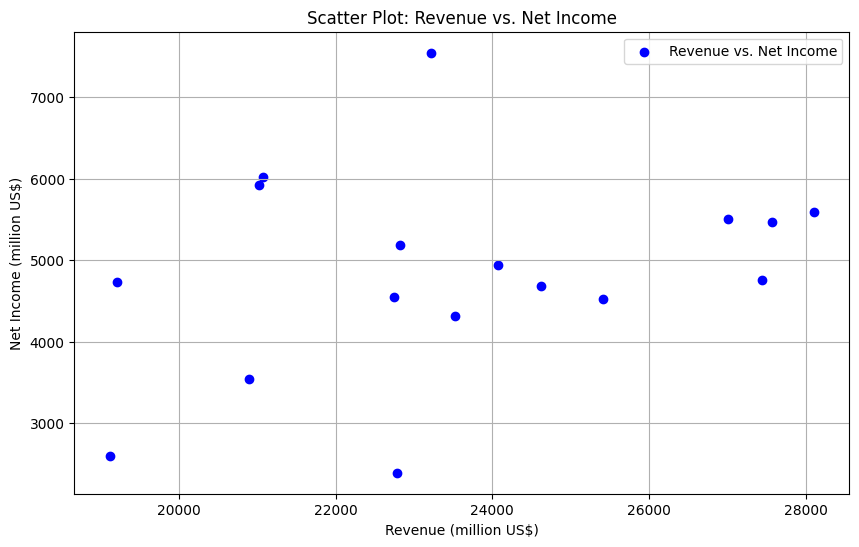

In [ ]:
import matplotlib.pyplot as plt

# Data
years = [
    2021, 2020, 2019, 2018, 2017, 2016, 2015, 2013, 2014, 2012, 2011, 2010, 2008, 2009, 2007, 2006, 2005
]
revenue = [
    23223, 19208, 21077, 21025, 22820, 24622, 25413, 28106, 27441, 27567, 27006, 24075, 23522, 22745, 22787, 20895, 19117
]
net_income = [
    7545, 4731, 6025, 5924, 5192, 4687, 4529, 5586, 4758, 5465, 5503, 4946, 4313, 4551, 2395, 3544, 2602
]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(revenue, net_income, color='blue', label='Revenue vs. Net Income', marker='o')

# Add labels and title
plt.xlabel('Revenue (million US$)')
plt.ylabel('Net Income (million US$)')
plt.title('Scatter Plot: Revenue vs. Net Income')

# Add a grid
plt.grid(True)

# Show legend
plt.legend()

# Show the plot
plt.show()





***Calculating Correlation between Total Assets and Prices per Share***

In [ ]:
import numpy as np

# Data
total_assets = [
    53606, 52627, 47511, 32811, 33804, 31024, 37939, 36626, 34227, 35387, 32990, 31975, 28462, 30225, 29392, 28975, 29989
]
price_per_share = [
    234.69, 200.89, 198.27, 166.06, 148.76, 120.14, 100.28, 97.26, 96.38, 92.53, 83.97, 70.91, 58.06, 57.44, 50.98, 36.79, 31.88
]

# Calculate the correlation coefficient
correlation = np.corrcoef(total_assets, price_per_share)[0, 1]

# Print the correlation coefficient
print(f"Correlation between Total Assets and Price per Share: {correlation:.2f}")




Correlation between Total Assets and Price per Share: 0.86


***Creating Scatter plot for Total Assets and Prices per Share***

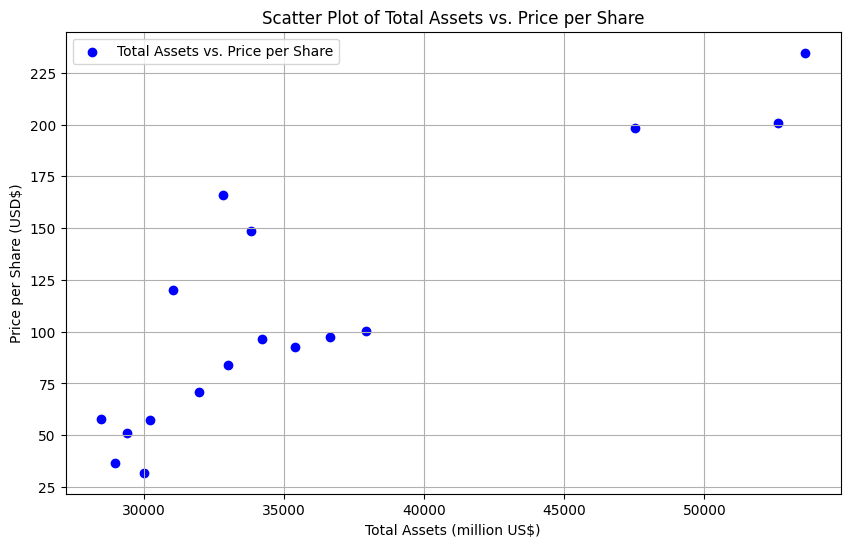

In [ ]:
import matplotlib.pyplot as plt

# Data
total_assets = [
    53606, 47511, 32811, 36626, 32990, 35387, 33804, 31975, 34227, 52627, 31024, 30225, 37939, 28462, 28975, 29989, 29392
]
price_per_share = [
    234.69, 198.27, 166.06, 97.26, 83.97, 92.53, 148.76, 70.91, 96.38, 200.89, 120.14, 57.44, 100.28, 58.06, 36.79, 31.88, 50.98
]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_assets, price_per_share, marker='o', color='blue', label='Total Assets vs. Price per Share')
plt.title('Scatter Plot of Total Assets vs. Price per Share')
plt.xlabel('Total Assets (million US$)')
plt.ylabel('Price per Share (USD$)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()





***Calculating Profitability and Efficiency Ratios***

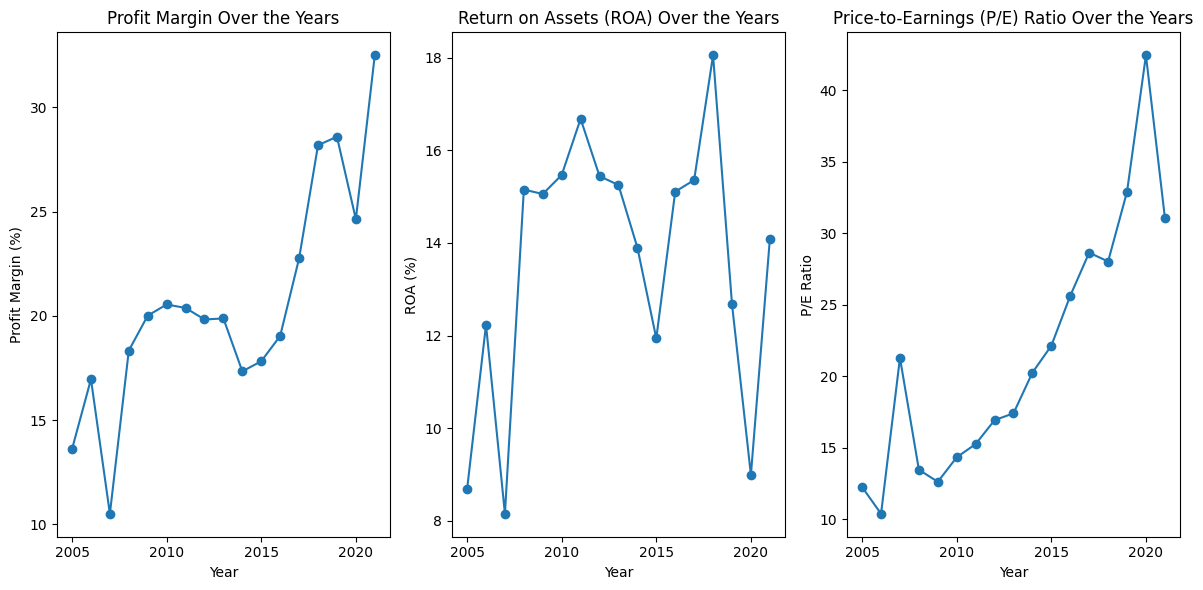

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Year": [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Revenue (million US$)": [
        19117, 20895, 22787, 23522, 22745, 24075, 27006, 27567, 28106, 27441, 25413, 24622, 22820, 21025, 21077, 19208, 23223
    ],
    "Net Income (million US$)": [
        2602, 3544, 2395, 4313, 4551, 4946, 5503, 5465, 5586, 4758, 4529, 4687, 5192, 5924, 6025, 4731, 7545
    ],
    "Total Assets (million US$)": [
        29989, 28975, 29392, 28462, 30225, 31975, 32990, 35387, 36626, 34227, 37939, 31024, 33804, 32811, 47511, 52627, 53606
    ],
    "Price per Share (USD$)": [
        31.88, 36.79, 50.98, 58.06, 57.44, 70.91, 83.97, 92.53, 97.26, 96.38, 100.28, 120.14, 148.76, 166.06, 198.27, 200.89, 234.69
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate profit margin, ROA, and P/E ratio
df["Profit Margin"] = (df["Net Income (million US$)"] / df["Revenue (million US$)"]) * 100
df["Return on Assets (ROA)"] = (df["Net Income (million US$)"] / df["Total Assets (million US$)"]) * 100
df["Price to Earnings (P/E)"] = df["Price per Share (USD$)"] / (df["Net Income (million US$)"] / 1000)  # Earnings per Share (EPS) is Net Income

# Create plots
plt.figure(figsize=(12, 6))

# Plot Profit Margin
plt.subplot(131)
plt.plot(df["Year"], df["Profit Margin"], marker='o', linestyle='-')
plt.title("Profit Margin Over the Years")
plt.xlabel("Year")
plt.ylabel("Profit Margin (%)")

# Plot ROA
plt.subplot(132)
plt.plot(df["Year"], df["Return on Assets (ROA)"], marker='o', linestyle='-')
plt.title("Return on Assets (ROA) Over the Years")
plt.xlabel("Year")
plt.ylabel("ROA (%)")

# Plot P/E ratio
plt.subplot(133)
plt.plot(df["Year"], df["Price to Earnings (P/E)"], marker='o', linestyle='-')
plt.title("Price-to-Earnings (P/E) Ratio Over the Years")
plt.xlabel("Year")
plt.ylabel("P/E Ratio")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()





***Employee Analysis by creating Line Chart and calculating Revenue per Employee***

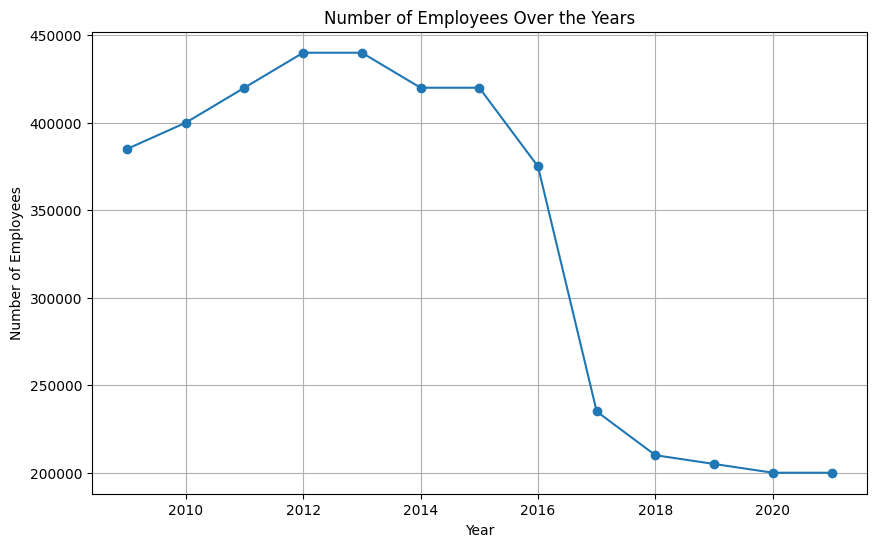

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Year": [
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021
    ],
    "Employees": [
        None, None, None, None, 385000, 400000, 420000, 440000, 440000,
        420000, 420000, 375000, 235000, 210000, 205000, 200000, 200000
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Employees"], marker='o', linestyle='-')
plt.title("Number of Employees Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.grid(True)

# Show the chart
plt.show()





In [ ]:
import pandas as pd

# Data
data = {
    "Year": [
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021
    ],
    "Revenue (million US$)": [
        19117, 20895, 22787, 23522, 22745, 24075, 27006, 27567, 28106,
        27441, 25413, 24622, 22820, 21025, 21077, 19208, 23223
    ],
    "Employees": [
        None, None, None, None, 385000, 400000, 420000, 440000, 440000,
        420000, 420000, 375000, 235000, 210000, 205000, 200000, 200000
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate revenue per employee
df["Revenue per Employee"] = df["Revenue (million US$)"] / df["Employees"]

# Print the result
print(df[["Year", "Revenue per Employee"]])



    Year  Revenue per Employee
0   2005                   NaN
1   2006                   NaN
2   2007                   NaN
3   2008                   NaN
4   2009              0.059078
5   2010              0.060187
6   2011              0.064300
7   2012              0.062652
8   2013              0.063877
9   2014              0.065336
10  2015              0.060507
11  2016              0.065659
12  2017              0.097106
13  2018              0.100119
14  2019              0.102815
15  2020              0.096040
16  2021              0.116115


***Location Analysis ***

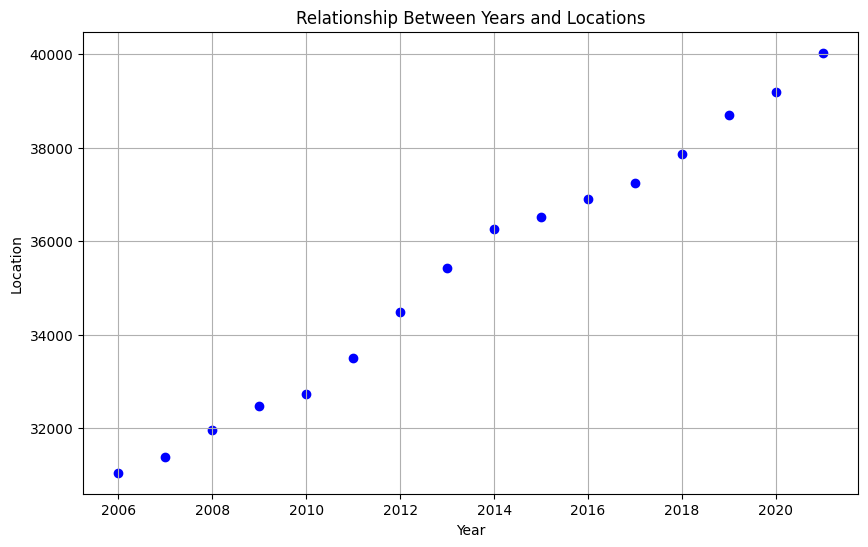

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Year": [
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021
    ],
    "Locations[134]": [
        "", 31046, 31377, 31967, 32478, 32737, 33510, 34480, 35429, 36258,
        36525, 36899, 37241, 37855, 38695, 39198, 40031
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Map non-numeric values to NaN
df["Locations[134]"] = pd.to_numeric(df["Locations[134]"], errors="coerce")

# Create the graph
plt.figure(figsize=(10, 6))
plt.scatter(df["Year"], df["Locations[134]"], marker='o', color='b')
plt.title("Relationship Between Years and Locations")
plt.xlabel("Year")
plt.ylabel("Location")
plt.grid(True)
plt.show()





***Calculating Correlation between Location and other metrics***

In [ ]:
import pandas as pd

# Sample data
data = {
    "Year": [
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021
    ],
    "Locations[134]": [
        "", 31046, 31377, 31967, 32478, 32737, 33510, 34480, 35429, 36258,
        36525, 36899, 37241, 37855, 38695, 39198, 40031
    ],
    "Revenue (million US$)": [
        19117, 20895, 22787, 23522, 22745, 24075, 27006, 27567, 28106, 27441,
        25413, 24622, 22820, 21025, 21077, 19208, 23223
    ],
    "Net Income (million US$)": [
        2602, 3544, 2395, 4313, 4551, 4946, 5503, 5465, 5586, 4758,
        4529, 4687, 5192, 5924, 6025, 4731, 7545
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Map non-numeric values to NaN
df["Locations[134]"] = pd.to_numeric(df["Locations[134]"], errors="coerce")

# Calculate correlation
correlation = df.corr()["Locations[134]"]

# Print the correlation between Locations and financial performance
print(correlation)





Year                        0.995512
Locations[134]              1.000000
Revenue (million US$)      -0.178192
Net Income (million US$)    0.703051
Name: Locations[134], dtype: float64


***Creating Heatmap to show Correlation***

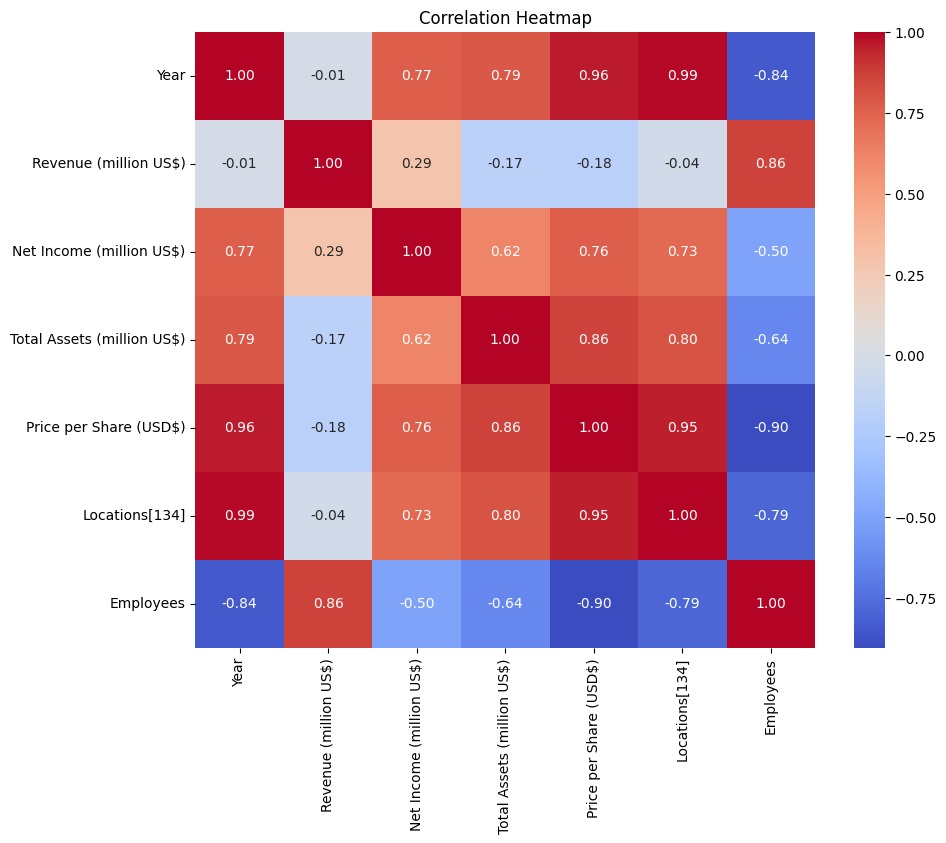

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your data)
data = {
    'Year': [2021, 2020, 2019, 2015, 2013, 2012, 2014, 2017, 2011, 2018, 2010, 2016, 2009, 2005, 2007, 2006, 2008],
    'Revenue (million US$)': [23223, 19208, 21077, 25413, 28106, 27567, 27441, 22820, 27006, 21025, 24075, 24622, 22745, 19117, 22787, 20895, 23522],
    'Net Income (million US$)': [7545, 4731, 6025, 4529, 5586, 5465, 4758, 5192, 5503, 5924, 4946, 4687, 4551, 2602, 2395, 3544, 4313],
    'Total Assets (million US$)': [53606, 52627, 47511, 37939, 36626, 35387, 34227, 33804, 32990, 32811, 31975, 31024, 30225, 29989, 29392, 28975, 28462],
    'Price per Share (USD$)': [234.69, 200.89, 198.27, 100.28, 97.26, 92.53, 96.38, 148.76, 83.97, 166.06, 70.91, 120.14, 57.44, 31.88, 50.98, 36.79, 58.06],
    'Locations[134]': [40031, 39198, 38695, 36525, 35429, 34480, 36258, 37241, 33510, 37855, 32737, 36899, 32478, 31888, 31377, 31046, 31967],
    'Employees': [200000, 200000, 205000, 420000, 440000, 440000, 420000, 235000, 420000, 210000, 400000, 375000, 385000, None, None, None, None]

}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

***Calculating Annual Growth Rate of Revenue and Net Income***

In [ ]:
import pandas as pd

# Sample data
data = {
    "Year": [
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021
    ],
    "Revenuein million US$": [
        19117, 20895, 22787, 23522, 22745, 24075, 27006, 27567, 28106, 27441,
        25413, 24622, 22820, 21025, 21077, 19208, 23223
    ],
    "Net incomein million US$": [
        2602, 3544, 2395, 4313, 4551, 4946, 5503, 5465, 5586, 4758,
        4529, 4687, 5192, 5924, 6025, 4731, 7545
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the annual growth rate
df["Revenue Growth Rate"] = df["Revenuein million US$"].pct_change() * 100
df["Net Income Growth Rate"] = df["Net incomein million US$"].pct_change() * 100

# Display the DataFrame
print(df)




    Year  Revenuein million US$  Net incomein million US$  \
0   2005                  19117                      2602   
1   2006                  20895                      3544   
2   2007                  22787                      2395   
3   2008                  23522                      4313   
4   2009                  22745                      4551   
5   2010                  24075                      4946   
6   2011                  27006                      5503   
7   2012                  27567                      5465   
8   2013                  28106                      5586   
9   2014                  27441                      4758   
10  2015                  25413                      4529   
11  2016                  24622                      4687   
12  2017                  22820                      5192   
13  2018                  21025                      5924   
14  2019                  21077                      6025   
15  2020                